In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [271]:
rng = np.random.default_rng(1)

In [272]:
n = 100

X = rng.normal(size=n)
eps = rng.normal(size=n, scale=3)

In [273]:
b_0 = 7
b_1 = -5

y = b_0 + b_1 * X + eps

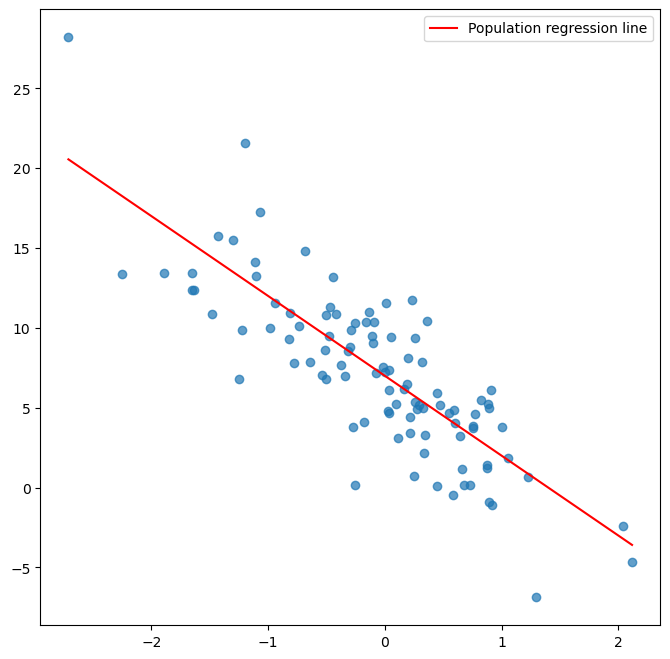

In [274]:
_, ax = plt.subplots(figsize=(8, 8))

ax.scatter(X, y, alpha=0.7)

x_line = np.linspace(X.min(), X.max(), 100)
y_line = b_0 + b_1 * x_line

ax.plot(x_line, y_line, c="r", label="Population regression line")
ax.legend()

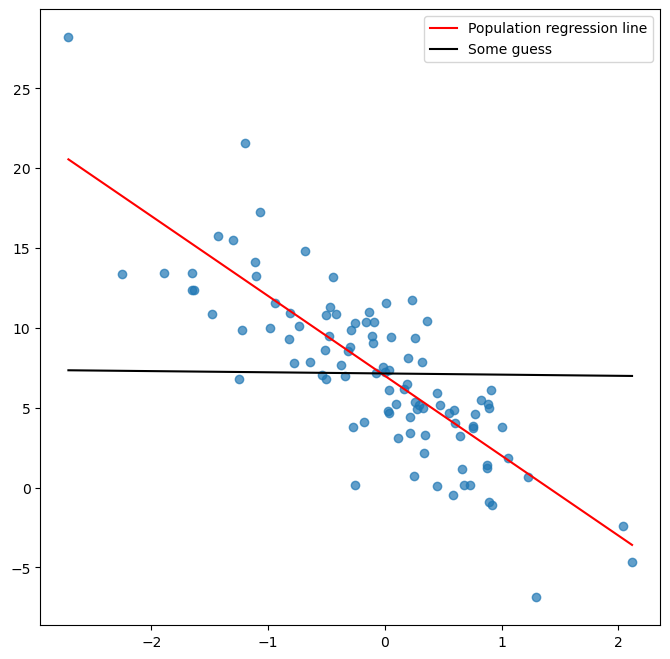

In [275]:
_, ax = plt.subplots(figsize=(8, 8))

ax.scatter(X, y, alpha=0.7)

x_line = np.linspace(X.min(), X.max(), 100)
y_line = b_0 + b_1 * x_line

ax.plot(x_line, y_line, c="r", label="Population regression line")

b_0_hat = y.mean()
b_1_hat = X.mean()

x_pred_line = np.linspace(X.min(), X.max(), 100)
y_pred_line = b_0_hat + b_1_hat * x_pred_line

ax.plot(x_pred_line, y_pred_line, c="black", label="Some guess")
ax.legend()

In [276]:
import sympy as sp

In [279]:
X = pd.DataFrame({"x_1": X})
X

,x_1
0,0.345584
1,0.821618
2,0.330437
3,-1.303157
4,0.905356
...,...
95,-2.250854
96,-0.138655
97,0.033000
98,-1.425349


In [280]:
y = pd.DataFrame({"y": y})
y

,y
0,3.318236
1,5.479244
2,4.971038
3,15.523246
4,6.129751
...,...
95,13.401869
96,11.022191
97,7.339317
98,15.771961


In [281]:
def RSS_gradient(X, y):
  n = X.shape[0]
  p = X.shape[1]
  
  b = []
  for i in range(0, p + 1):
    b.append(sp.Symbol(f"b_{i}"))
    
  RSS = sum(
    (float(y.loc[i]) - (b[0] + sum(b[j + 1] * float(X.iloc[i, j]) for j in range(p))))**2 
    for i in range(n)
  )
  
  dRSS_db_i = []
  for b_i in b:
    dRSS_db_i.append(sp.diff(RSS, b_i))
  
  return dRSS_db_i  
    

In [282]:
def compute_gradient(grad, b):
  b_dict = {f"b_{i}": b[i] for i in range(len(b))}
  return np.array([float(grad[i].subs(b_dict)) for i in range(0, len(grad))])

In [283]:
def gradient_descent(X, y, steps=1000):
  
  p = X.shape[1]
  
  grad = RSS_gradient(X, y)
  learning_rate = 0.001
  
  b_values = np.full(p+1, 1)
  b_values[0] = 0
  
  computed_gradient = compute_gradient(grad, b_values)
  
  n = 0
  epsilon = 1e-8
  while np.linalg.norm(computed_gradient) > epsilon or n < steps:
    step_size = computed_gradient * learning_rate
    b_values = b_values - step_size
    print("new coeffs: ", b_values)
    computed_gradient = compute_gradient(grad, b_values)
    n += 1
  
  return b_values

In [284]:
coefs = gradient_descent(X, y)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2040\4037234484.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  (float(y.loc[i]) - (b[0] + sum(b[j + 1] * float(X.iloc[i, j]) for j in range(p))))**2


new coeffs:  [1.44410686 0.00984796]
new coeffs:  [ 2.58481491 -0.81436872]
new coeffs:  [ 3.48524688 -1.50136221]
new coeffs:  [ 4.19547825 -2.07472012]
new coeffs:  [ 4.75522212 -2.55384636]
new coeffs:  [ 5.19596332 -2.95472498]
new coeffs:  [ 5.54265438 -3.29054105]
new coeffs:  [ 5.81506319 -3.57218571]
new coeffs:  [ 6.02884376 -3.80866775]
new coeffs:  [ 6.19638662 -4.00744921]
new coeffs:  [ 6.32749436 -4.17471937]
new coeffs:  [ 6.42991793 -4.31561887]
new coeffs:  [ 6.50978241 -4.43442313]
new coeffs:  [ 6.5719249  -4.53469268]
new coeffs:  [ 6.62016269 -4.6193966 ]
new coeffs:  [ 6.65750587 -4.69101396]
new coeffs:  [ 6.68632603 -4.75161728]
new coeffs:  [ 6.70848993 -4.80294132]
new coeffs:  [ 6.72546544 -4.84643992]
new coeffs:  [ 6.73840544 -4.88333287]
new coeffs:  [ 6.74821429 -4.91464475]
new coeffs:  [ 6.75560038 -4.94123713]
new coeffs:  [ 6.76111775 -4.96383527]
new coeffs:  [ 6.76519895 -4.98305028]
new coeffs:  [ 6.76818101 -4.99939763]
new coeffs:  [ 6.77032599 -

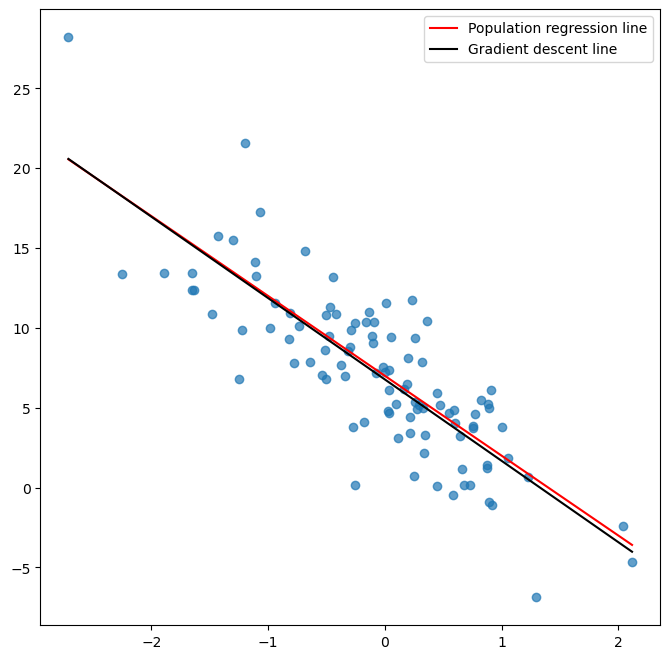

In [285]:
_, ax = plt.subplots(figsize=(8, 8))

ax.scatter(X, y, alpha=0.7)

x_line = np.linspace(X.min(), X.max(), 100)
y_line = b_0 + b_1 * x_line

ax.plot(x_line, y_line, c="r", label="Population regression line")

b_0_hat = coefs[0]
b_1_hat = coefs[1]

x_pred_line = np.linspace(X.min(), X.max(), 100)
y_pred_line = b_0_hat + b_1_hat * x_pred_line

ax.plot(x_pred_line, y_pred_line, c="black", label="Gradient descent line")
ax.legend()

In [291]:
#X["x_1^2"] = X**2
X

,x_1,x_1^2
0,0.345584,0.119428
1,0.821618,0.675056
2,0.330437,0.109189
3,-1.303157,1.698219
4,0.905356,0.819669
...,...,...
95,-2.250854,5.066345
96,-0.138655,0.019225
97,0.033000,0.001089
98,-1.425349,2.031620


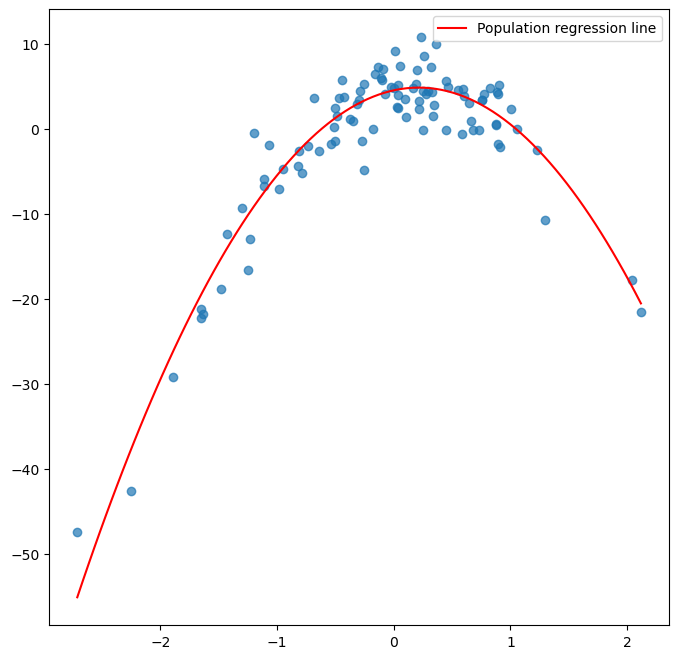

In [294]:
b_0 = 4.5
b_1 = 3
b_2 = -7

# compute target
y = b_0 + b_1 * X["x_1"] + b_2 * (X["x_1"] ** 2) + eps

# plotting
_, ax = plt.subplots(figsize=(8, 8))

ax.scatter(X["x_1"], y, alpha=0.7)

x_line = np.linspace(X["x_1"].min(), X["x_1"].max(), 100)
y_line = b_0 + b_1 * x_line + b_2 * x_line**2

ax.plot(x_line, y_line, c="r", label="Population regression line")
ax.legend()


In [295]:
coefs = gradient_descent(X, y)

new coeffs:  [-0.34258072  1.87058102 -1.63472757]
new coeffs:  [-0.2188589   2.39319024 -3.12735814]
new coeffs:  [ 0.10590613  2.71904804 -4.01699323]
new coeffs:  [ 0.5005033   2.92923397 -4.58273326]
new coeffs:  [ 0.90193775  3.06819702 -4.96973773]
new coeffs:  [ 1.28167776  3.16107888 -5.2540839 ]
new coeffs:  [ 1.62838404  3.22269863 -5.47614737]
new coeffs:  [ 1.93910274  3.26223729 -5.65779101]
new coeffs:  [ 2.21480039  3.28570085 -5.81122417]
new coeffs:  [ 2.45812261  3.2972323  -5.94357545]
new coeffs:  [ 2.67228847  3.29982457 -6.05925897]
new coeffs:  [ 2.86056224  3.29571925 -6.16120404]
new coeffs:  [ 3.02601638  3.28663863 -6.25149847]
new coeffs:  [ 3.17143924  3.27392763 -6.33172913]
new coeffs:  [ 3.29931317  3.25864579 -6.40316538]
new coeffs:  [ 3.41182513  3.24163043 -6.46686075]
new coeffs:  [ 3.51089095  3.22354248 -6.52371161]
new coeffs:  [ 3.59818399  3.20490112 -6.57449285]
new coeffs:  [ 3.6751638   3.18611085 -6.61988115]
new coeffs:  [ 3.74310285  3.16

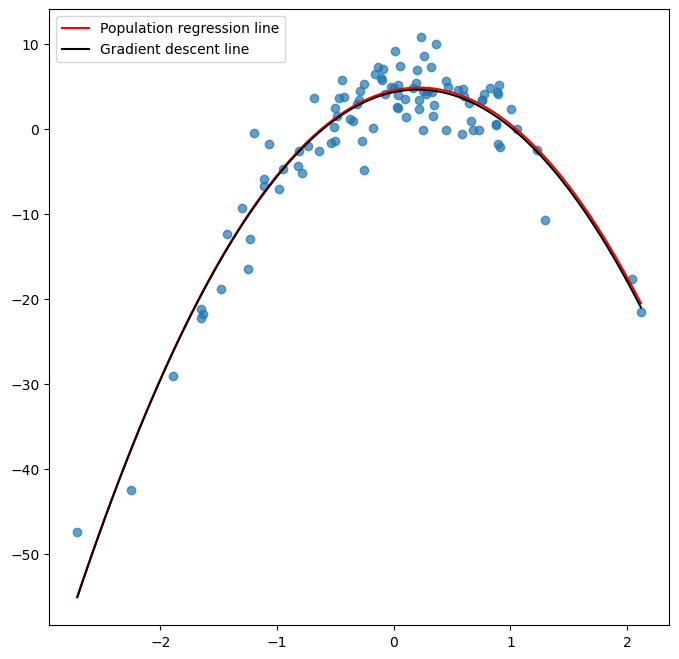

In [298]:
b_0 = 4.5
b_1 = 3
b_2 = -7

# compute target
y = b_0 + b_1 * X["x_1"] + b_2 * (X["x_1"] ** 2) + eps

# plotting
_, ax = plt.subplots(figsize=(8, 8))

ax.scatter(X["x_1"], y, alpha=0.7)

x_line = np.linspace(X["x_1"].min(), X["x_1"].max(), 100)
y_line = b_0 + b_1 * x_line + b_2 * x_line**2

ax.plot(x_line, y_line, c="r", label="Population regression line")

y_pred_line = coefs[0] + coefs[1] * x_line + coefs[2] * x_line**2
ax.plot(x_line, y_pred_line, c="black", label="Gradient descent line")

ax.legend()